# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = soup(html, 'html.parser')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [22]:
# extract the table data
mars_data = soup.find_all('tr')
# Create an empty list
mars_weather = []
# Loop through the scraped data to create a list of rows
for row in mars_data:
    mars_weather.append(row.text)
# Create a dataframe
mars_weather_df = pd.DataFrame(mars_weather)
mars_weather_df = mars_weather_df[0].str.split('\n', expand=True)
mars_weather_df = mars_weather_df.drop([0])
mars_weather_df = mars_weather_df.rename(columns={1: 'id', 2: 'terrestrial_date', 3: 'sol', 4: 'ls', 5: 'month', 6: 'min_temp', 7: 'pressure'})
mars_weather_df = mars_weather_df.drop(columns=[0])
mars_weather_df = mars_weather_df.set_index('id')
mars_weather_df.to_csv('mars_weather.csv')
mars_weather_df

,terrestrial_date,sol,ls,month,min_temp,pressure,8
id,,,,,,,
2,2012-08-16,10,155,6,-75.0,739.0,
13,2012-08-17,11,156,6,-76.0,740.0,
24,2012-08-18,12,156,6,-76.0,741.0,
35,2012-08-19,13,157,6,-74.0,732.0,
46,2012-08-20,14,157,6,-74.0,740.0,
...,...,...,...,...,...,...,...
1889,2018-02-23,1973,133,5,-78.0,730.0,
1892,2018-02-24,1974,134,5,-77.0,729.0,
1894,2018-02-25,1975,134,5,-76.0,729.0,


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [23]:
# Examine data type of each column
mars_weather_df.dtypes

terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
8                   object
dtype: object

In [24]:
# Change data types for data analysis
# Change sol to integer
mars_weather_df['sol'] = mars_weather_df['sol'].astype(int)
# Change ls to float
mars_weather_df['ls'] = mars_weather_df['ls'].astype(float)
# Change month to integer
mars_weather_df['month'] = mars_weather_df['month'].astype(int)
# Change min_temp to float
mars_weather_df['min_temp'] = mars_weather_df['min_temp'].astype(float)
# Change pressure to float
mars_weather_df['pressure'] = mars_weather_df['pressure'].astype(float)


In [25]:
# Confirm type changes were successful by examining data types again
mars_weather_df.dtypes


terrestrial_date     object
sol                   int32
ls                  float64
month                 int32
min_temp            float64
pressure            float64
8                    object
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [27]:
mars_weather_df

,terrestrial_date,sol,ls,month,min_temp,pressure,8
id,,,,,,,
2,2012-08-16,10,155.0,6,-75.0,739.0,
13,2012-08-17,11,156.0,6,-76.0,740.0,
24,2012-08-18,12,156.0,6,-76.0,741.0,
35,2012-08-19,13,157.0,6,-74.0,732.0,
46,2012-08-20,14,157.0,6,-74.0,740.0,
...,...,...,...,...,...,...,...
1889,2018-02-23,1973,133.0,5,-78.0,730.0,
1892,2018-02-24,1974,134.0,5,-77.0,729.0,
1894,2018-02-25,1975,134.0,5,-76.0,729.0,


In [33]:
# 1. How many months are there on Mars?
# Analyze the data
# Group the number of months make a new dataframe
mars_months = mars_weather_df.groupby('month').count()
# print the month column and terrestial_date column
mars_months = mars_months[['terrestrial_date']]
# Rename the column
mars_months = mars_months.rename(columns={'terrestrial_date': 'count'})
# Display the dataframe
mars_months

,count
month,
1,174
2,178
3,192
4,194
5,149
6,147
7,142
8,141
9,134


In [30]:
# 2. How many Martian days' worth of data are there?
# Analyze the data
# Count the number of sols
mars_sols = mars_weather_df['sol'].count()
# Display the number of sols
mars_sols

1867

In [40]:
# 3. What is the average low temperature by month?
# Analyze the data
# Group the data by month first
mars_months = mars_weather_df.groupby('month')
# Find the average of the min_temp column
mars_months = mars_months['min_temp'].mean()
# Create a dataframe
mars_months = pd.DataFrame(mars_months)
# Display the dataframe
mars_months


,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


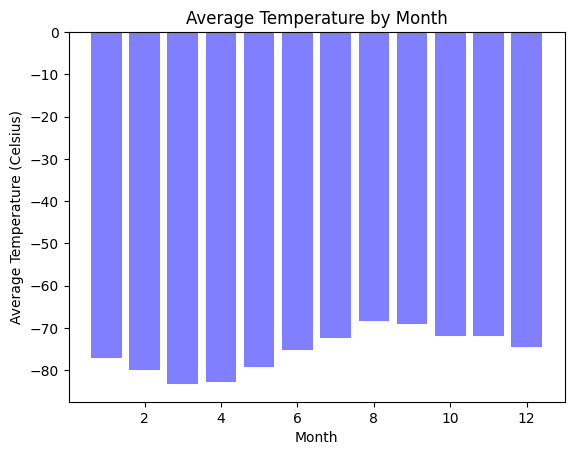

In [41]:
# Plot the average temperature by month using a bar chart
# Set the x-axis to the months
x_axis = mars_months.index
# Set the y-axis to the average temperature
y_axis = mars_months['min_temp']
# Create a bar chart
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center")
# Create a title
plt.title("Average Temperature by Month")
# Create a label for the y-axis
plt.ylabel("Average Temperature (Celsius)")
# Create a label for the x-axis
plt.xlabel("Month")
# Save the figure
plt.savefig("Average Temperature by Month.png")
# Show the figure
plt.show()


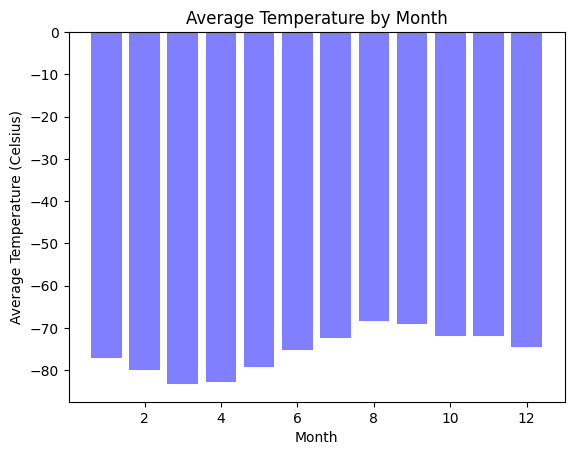

In [48]:
# Identify the coldest and hottest months
# The hottest month is month 3
# The coldest month is month 8

In [49]:
# 4. Average pressure by Martian month
# Analyze the data
# Group the data by month first
mars_months = mars_weather_df.groupby('month')
# Find the average of the pressure column
mars_months = mars_months['pressure'].mean()
# Create a dataframe
mars_months = pd.DataFrame(mars_months)
# Display the dataframe
mars_months

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


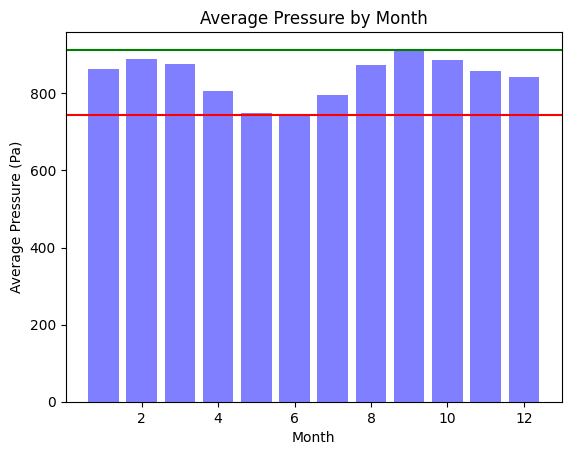

In [53]:
# Plot the average pressure by month
# Set the x-axis to the months
x_axis = mars_months.index
# Set the y-axis to the average pressure
y_axis = mars_months['pressure']
# Create a bar chart
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center")
plt.title("Average Pressure by Month")
plt.ylabel("Average Pressure (Pa)")
plt.xlabel("Month")
plt.axhline(y=745, color='r', linestyle='-')
plt.axhline(y=913, color='g', linestyle='-')
plt.savefig("Average Pressure by Month.png")
plt.show()

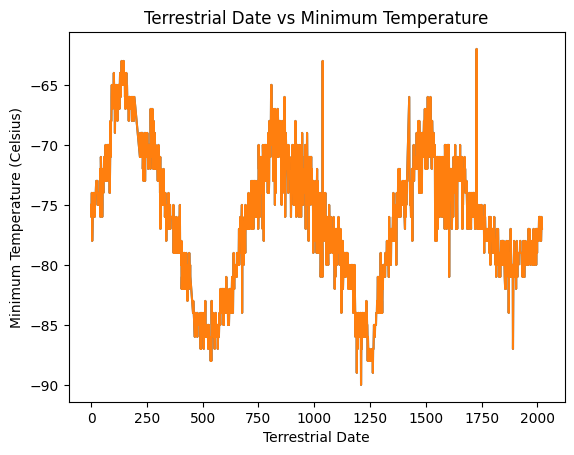

In [66]:
# 5. How many terrestrial (earth) days are there in a Martian year?
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'])
mars_weather_df['days_from_first_day'] = mars_weather_df['terrestrial_date'] - mars_weather_df['terrestrial_date'].min()
mars_weather_df['days_from_first_day'] = mars_weather_df['days_from_first_day'].dt.days
plt.plot(mars_weather_df['days_from_first_day'], mars_weather_df['min_temp'])

#Graph
plt.plot(mars_weather_df['days_from_first_day'], mars_weather_df['min_temp'])
plt.title("Terrestrial Date vs Minimum Temperature")
plt.ylabel("Minimum Temperature (Celsius)")
plt.xlabel("Terrestrial Date")
plt.savefig("Terrestrial Date vs Minimum Temperature.png")
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [67]:
# Write the data to a CSV
mars_weather_df.to_csv('mars_weather.csv')

In [68]:
browser.quit()